In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Experiment name for output plots
expt_name = 'fp_scaled' 
# expt_name = 'low_error_core' 
# expt_name = 'multivar_core' 
# expt_name = 'low_error_uscrn' 
# expt_name = 'fp_precip_uscrn' 
# expt_name = 'multivar_uscrn' 

# List of experiment names
experiment_names = ['OLv7_M36_MULTI_type_13_comb_fp_scaled','DAv7_M36_ASCAT_type_13_comb_fp_scaled', 
                    'DAv7_M36_SMAP_type_13_comb_fp_scaled', 'DAv7_M36_MULTI_type_13_comb_fp_scaled']

# insitu_tag plus details of timestep and number of years analysed in matlab file name
insitu_tag = '_CalVal_M33_SM_3h__6yr'
# insitu_tag = '_USCRN_SM_3h_c1234smv_6yr'

# Create MATLAB file names based on experiment names
matlab_files = [f'../test_data/fp_scaled/{name}'+ insitu_tag +'_stats.mat' for name in experiment_names]

# Read the first MATLAB file to get the shape of Bias
first_file = matlab_files[0]
mat_contents = sio.loadmat(first_file)
shape = mat_contents['Bias'].shape

# Create empty arrays with the shape of Bias and number of experiments
num_exp = len(matlab_files)
Bias = np.zeros(shape + (num_exp,))
BiasLO = np.zeros(shape + (num_exp,))
BiasUP = np.zeros(shape + (num_exp,))
RMSE = np.zeros(shape + (num_exp,))
RMSELO = np.zeros(shape + (num_exp,))
RMSEUP = np.zeros(shape + (num_exp,))
R = np.zeros(shape + (num_exp,))
RLO = np.zeros(shape + (num_exp,))
RUP = np.zeros(shape + (num_exp,))
absBias = np.zeros(shape + (num_exp,))
absBiasLO = np.zeros(shape + (num_exp,))
absBiasUP = np.zeros(shape + (num_exp,))
anomR = np.zeros(shape + (num_exp,))
anomRLO = np.zeros(shape + (num_exp,))
anomRUP = np.zeros(shape + (num_exp,))
ubRMSE = np.zeros(shape + (num_exp,))
ubRMSELO = np.zeros(shape + (num_exp,))
ubRMSEUP = np.zeros(shape + (num_exp,))

# Read data from the MATLAB files
for i, file in enumerate(matlab_files):
    mat_contents = sio.loadmat(file)
    Bias[:, :, i] = mat_contents['Bias']
    BiasLO[:, :, i] = mat_contents['BiasLO']
    BiasUP[:, :, i] = mat_contents['BiasUP']
    RMSE[:, :, i] = mat_contents['RMSE']
    RMSELO[:, :, i] = mat_contents['RMSELO']
    RMSEUP[:, :, i] = mat_contents['RMSEUP']
    R[:, :, i] = mat_contents['R']
    RLO[:, :, i] = mat_contents['RLO']
    RUP[:, :, i] = mat_contents['RUP']
    absBias[:, :, i] = mat_contents['absBias']
    absBiasLO[:, :, i] = mat_contents['absBiasLO']
    absBiasUP[:, :, i] = mat_contents['absBiasUP']
    anomR[:, :, i] = mat_contents['anomR']
    anomRLO[:, :, i] = mat_contents['anomRLO']
    anomRUP[:, :, i] = mat_contents['anomRUP']
    ubRMSE[:, :, i] = mat_contents['ubRMSE']
    ubRMSELO[:, :, i] = mat_contents['ubRMSELO']
    ubRMSEUP[:, :, i] = mat_contents['ubRMSEUP']

In [3]:
# Print keys
print(mat_contents.keys())

# Read data
INSITU_id = mat_contents['INSITU_id']

id_list = INSITU_id[0].tolist()
id_list = [str(id[0]) for id in id_list]

INSITU_lat = mat_contents['INSITU_lat']
INSITU_lon = mat_contents['INSITU_lon']
ind_tile = mat_contents['ind_tile']

dict_keys(['__header__', '__version__', '__globals__', 'Bias', 'BiasLO', 'BiasUP', 'INSITU_id', 'INSITU_id_string', 'INSITU_lat', 'INSITU_lon', 'INSITU_path', 'INSITU_st', 'INSITU_tag', 'LDAS_st_org', 'N_data', 'Nday_shift', 'Nday_window', 'Nmin', 'Nmin_day', 'R', 'RLO', 'RMSE', 'RMSELO', 'RMSEUP', 'RUP', 'absBias', 'absBiasLO', 'absBiasUP', 'add_anomR', 'anomR', 'anomRLO', 'anomRUP', 'data_ext', 'date_time', 'date_time_string', 'date_time_vec', 'date_time_vec1', 'day_vec', 'distance', 'distance_min', 'dofyr', 'dofyr_list', 'domain', 'doy', 'doy_vec', 'dtstep', 'end_time', 'end_time_tmp', 'exp_path', 'exp_run', 'exp_run_name', 'file_ext', 'file_tag', 'fname', 'fname_tilecoord', 'fname_tmp', 'fout_name', 'fout_path', 'i', 'id', 'ind', 'ind_end_time', 'ind_hour', 'ind_start_time', 'ind_t', 'ind_tile', 'ind_tmp', 'insitu_anom', 'insitu_clim', 'insitu_data', 'it', 'j', 'kk', 'kkk', 'max_distance', 'model_anom', 'model_clim', 'model_data', 'month_vec', 'nc', 'nn', 'nodata_tol', 'nodata_val'

In [4]:
print(ind_tile)

[[ 37769   4555 108944  10591  80408   6496  10629  10344  15102  14608
   12068  26258   3616   7471  40901  40533  10359  43182]]


In [5]:

# Get info about ubRMSE
print(ubRMSE.shape)
print(ubRMSE.dtype)

num_sites = ubRMSE.shape[0]
print("num_sites: ", num_sites)

num_depths = ubRMSE.shape[1]
print("num_depths: ", num_depths)

num_expts = ubRMSE.shape[2]
print("num_expts: ", num_expts)

(18, 2, 4)
float64
num_sites:  18
num_depths:  2
num_expts:  4


In [6]:
# Plot bar chart of ubRMSE for both depths, for the three experiments at each site with error bars
width = 0.2
ind = np.arange(num_sites)

expt_labels = ["CNTL", "ASCT","SMAP","MULT", "", "", ""] 

num_expts = 4


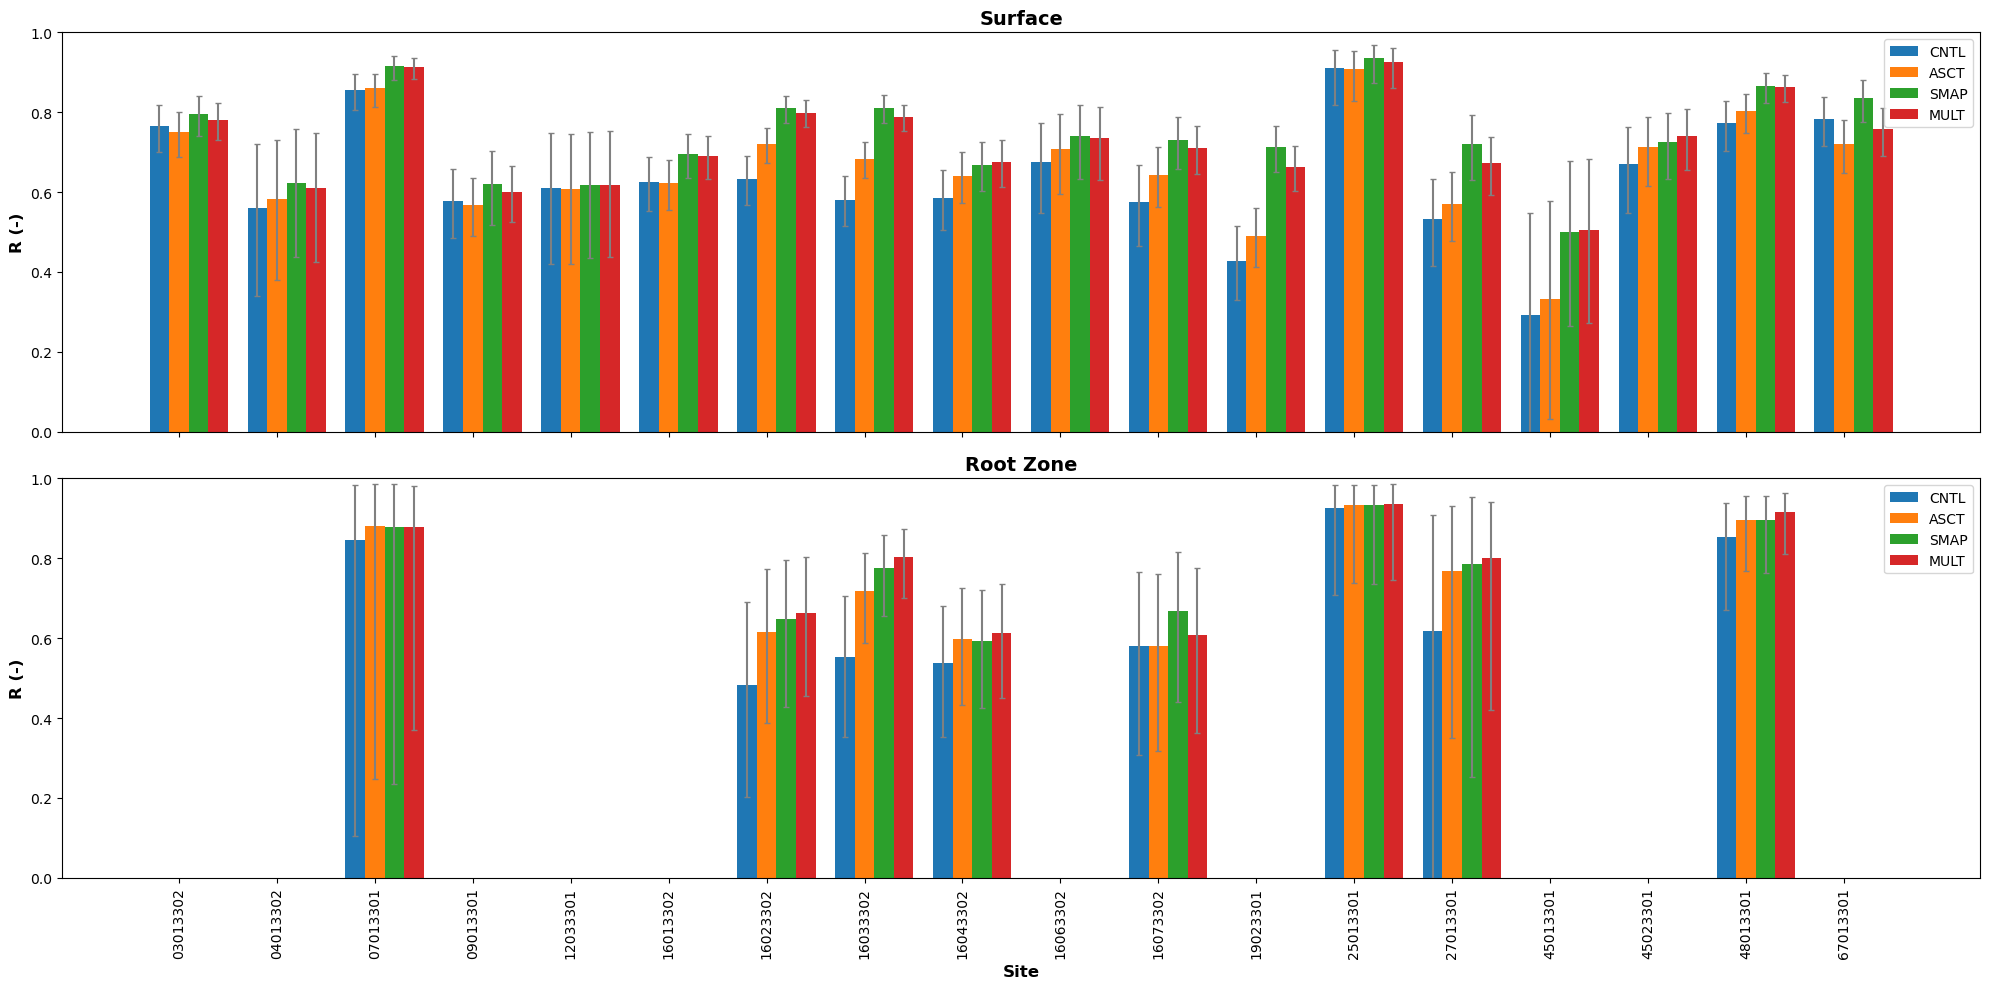

In [7]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot bar chart of R for Surface (depth 0) in the top subplot
for expt in range(num_expts):
    axs[0].bar(ind + expt * width, R[:, 0, expt], width, label=expt_labels[expt])

# Add error bars for RUP and RLO for Surface
for expt in range(num_expts):
    axs[0].errorbar(ind + expt * width, R[:, 0, expt], yerr=[-RLO[:, 0, expt], RUP[:, 0, expt]], fmt='none', color='grey', capsize=2)

axs[0].set_ylabel('R (-)', weight='bold', fontsize=12)
axs[0].set_title('Surface', weight='bold', fontsize=14)
axs[0].legend()

# Set y-axis limits for the top subplot
axs[0].set_ylim(0, 1)

# Plot bar chart of R for Root zone (depth 1) in the bottom subplot
for expt in range(num_expts):
    axs[1].bar(ind + expt * width, R[:, 1, expt], width, label=expt_labels[expt])

# Add error bars for RUP and RLO for Root zone
for expt in range(num_expts):
    axs[1].errorbar(ind + expt * width, R[:, 1, expt], yerr=[-RLO[:, 1, expt], RUP[:, 1, expt]], fmt='none', color='grey', capsize=2)

axs[1].set_xlabel('Site', weight='bold', fontsize=12)
axs[1].set_ylabel('R (-)', weight='bold', fontsize=12)
axs[1].set_title('Root Zone', weight='bold', fontsize=14)
axs[1].legend()

# Set y-axis limits for the top subplot
axs[1].set_ylim(0, 1)

plt.xticks(ind + width, id_list, rotation=90)
plt.tight_layout()

plt.savefig(expt_name + '_R.png')

plt.show()

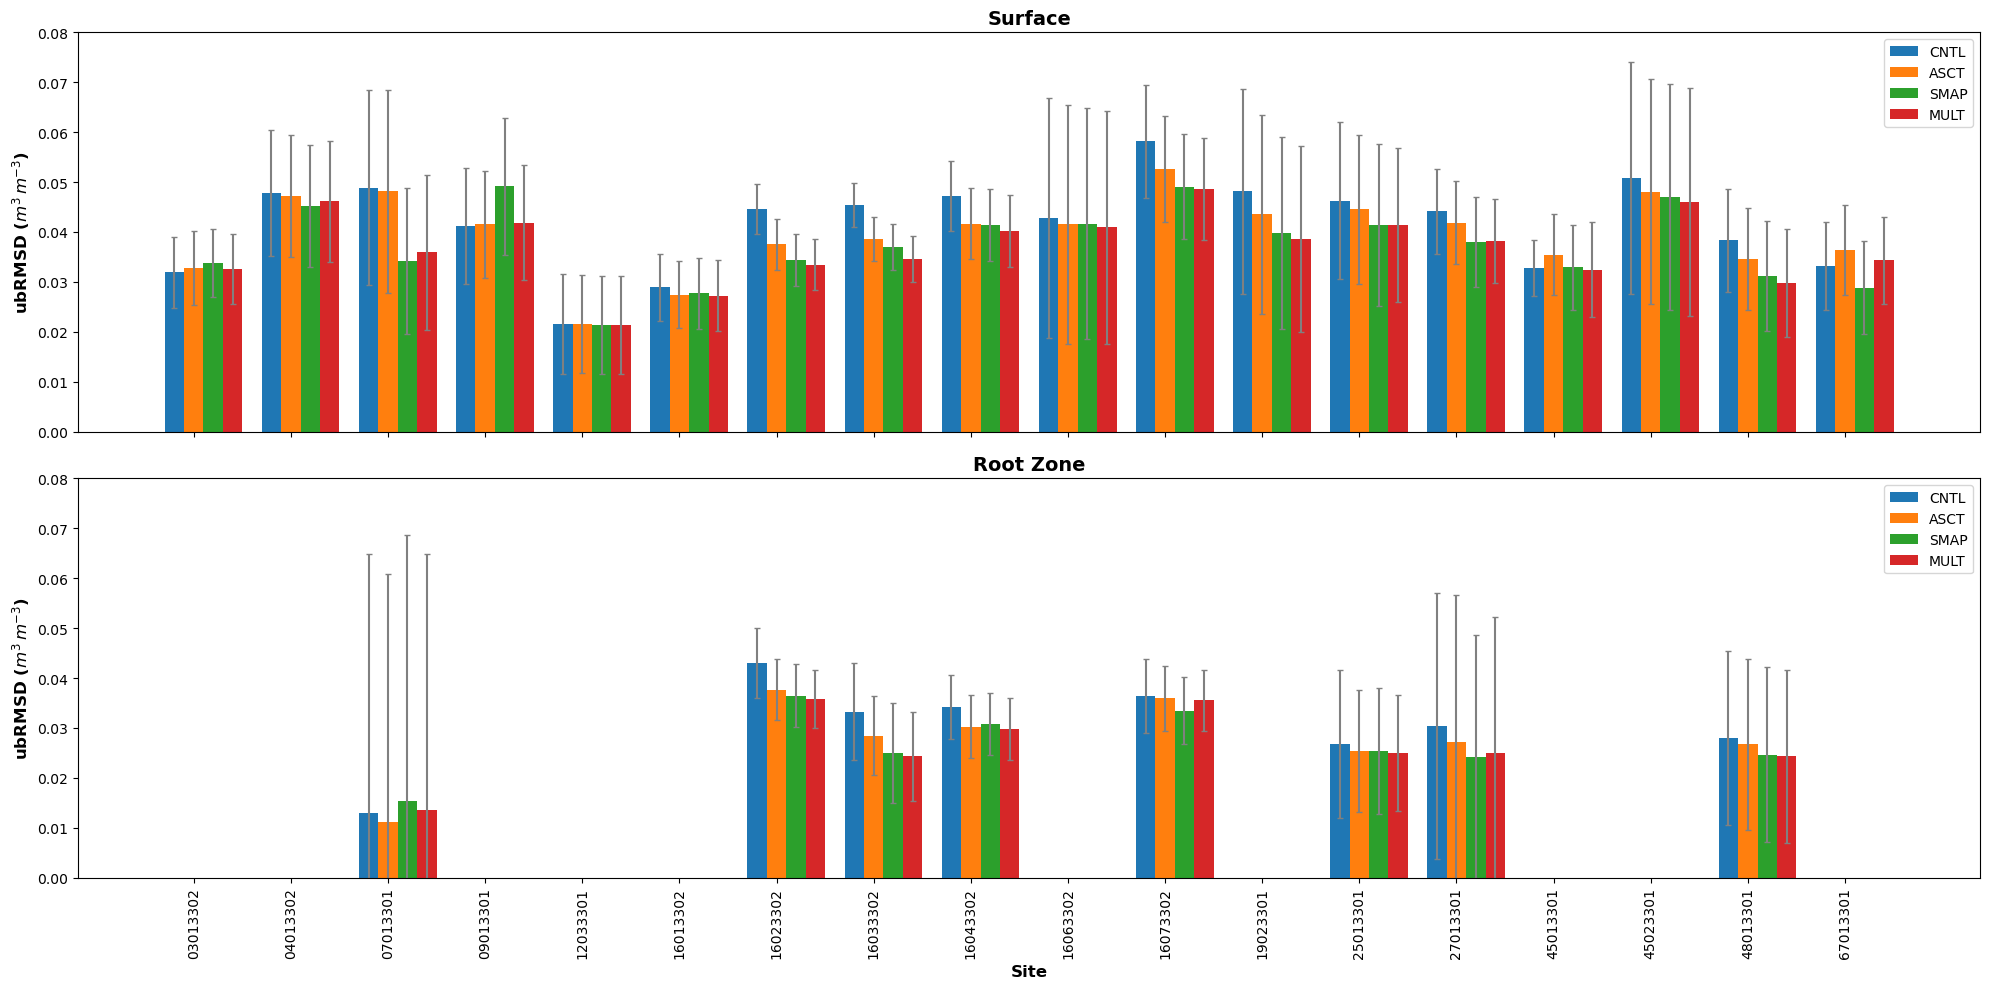

In [8]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot bar chart of R for Surface (depth 0) in the top subplot
for expt in range(num_expts):
    axs[0].bar(ind + expt * width, ubRMSE[:, 0, expt], width, label=expt_labels[expt])

# Add error bars for RUP and RLO for Surface
for expt in range(num_expts):
    axs[0].errorbar(ind + expt * width, ubRMSE[:, 0, expt], yerr=[-ubRMSELO[:, 0, expt], ubRMSEUP[:, 0, expt]], fmt='none', color='grey', capsize=2)

axs[0].set_ylabel('ubRMSD ($m^3 \, m^{-3}$)', weight='bold', fontsize=12)
axs[0].set_title('Surface', weight='bold', fontsize=14)
axs[0].legend()

# Set y-axis limits for the top subplot
axs[0].set_ylim(0, 0.08)

# Plot bar chart of R for Root zone (depth 1) in the bottom subplot
for expt in range(num_expts):
    axs[1].bar(ind + expt * width, ubRMSE[:, 1, expt], width, label=expt_labels[expt])

# Add error bars for RUP and RLO for Root zone
for expt in range(num_expts):
    axs[1].errorbar(ind + expt * width, ubRMSE[:, 1, expt], yerr=[-ubRMSELO[:, 1, expt], ubRMSEUP[:, 1, expt]], fmt='none', color='grey', capsize=2)

axs[1].set_xlabel('Site', weight='bold', fontsize=12)
axs[1].set_ylabel('ubRMSD ($m^3 \, m^{-3}$)', weight='bold', fontsize=12)
axs[1].set_title('Root Zone', weight='bold', fontsize=14)
axs[1].legend()

# Set y-axis limits for the top subplot
axs[1].set_ylim(0, 0.08)

plt.xticks(ind + width, id_list, rotation=90)
plt.tight_layout()

plt.savefig(expt_name + '_ubRMSE.png')

plt.show()

In [9]:
# Calculate R_mean, Bias, RMSE, and ubRMSE from R
R_mean = np.around(np.nanmean(R, axis=0), decimals=2)
R_std = np.around(np.nanstd(R, axis=0), decimals=3)
anomR_mean = np.around(np.nanmean(anomR, axis=0), decimals=2)
anomR_std = np.around(np.nanstd(anomR, axis=0), decimals=3)
Bias_mean = np.around(np.nanmean(Bias, axis=0), decimals=3)
Bias_std = np.around(np.nanstd(Bias, axis=0), decimals=3)
absBias_mean = np.around(np.nanmean(absBias, axis=0), decimals=3)
absBias_std = np.around(np.nanstd(absBias, axis=0), decimals=3)
RMSE_mean = np.around(np.nanmean(RMSE, axis=0), decimals=3)
RMSE_std = np.around(np.nanstd(RMSE, axis=0), decimals=3)
ubRMSE_mean = np.around(np.nanmean(ubRMSE, axis=0), decimals=3)
ubRMSE_std = np.around(np.nanstd(ubRMSE, axis=0), decimals=3)


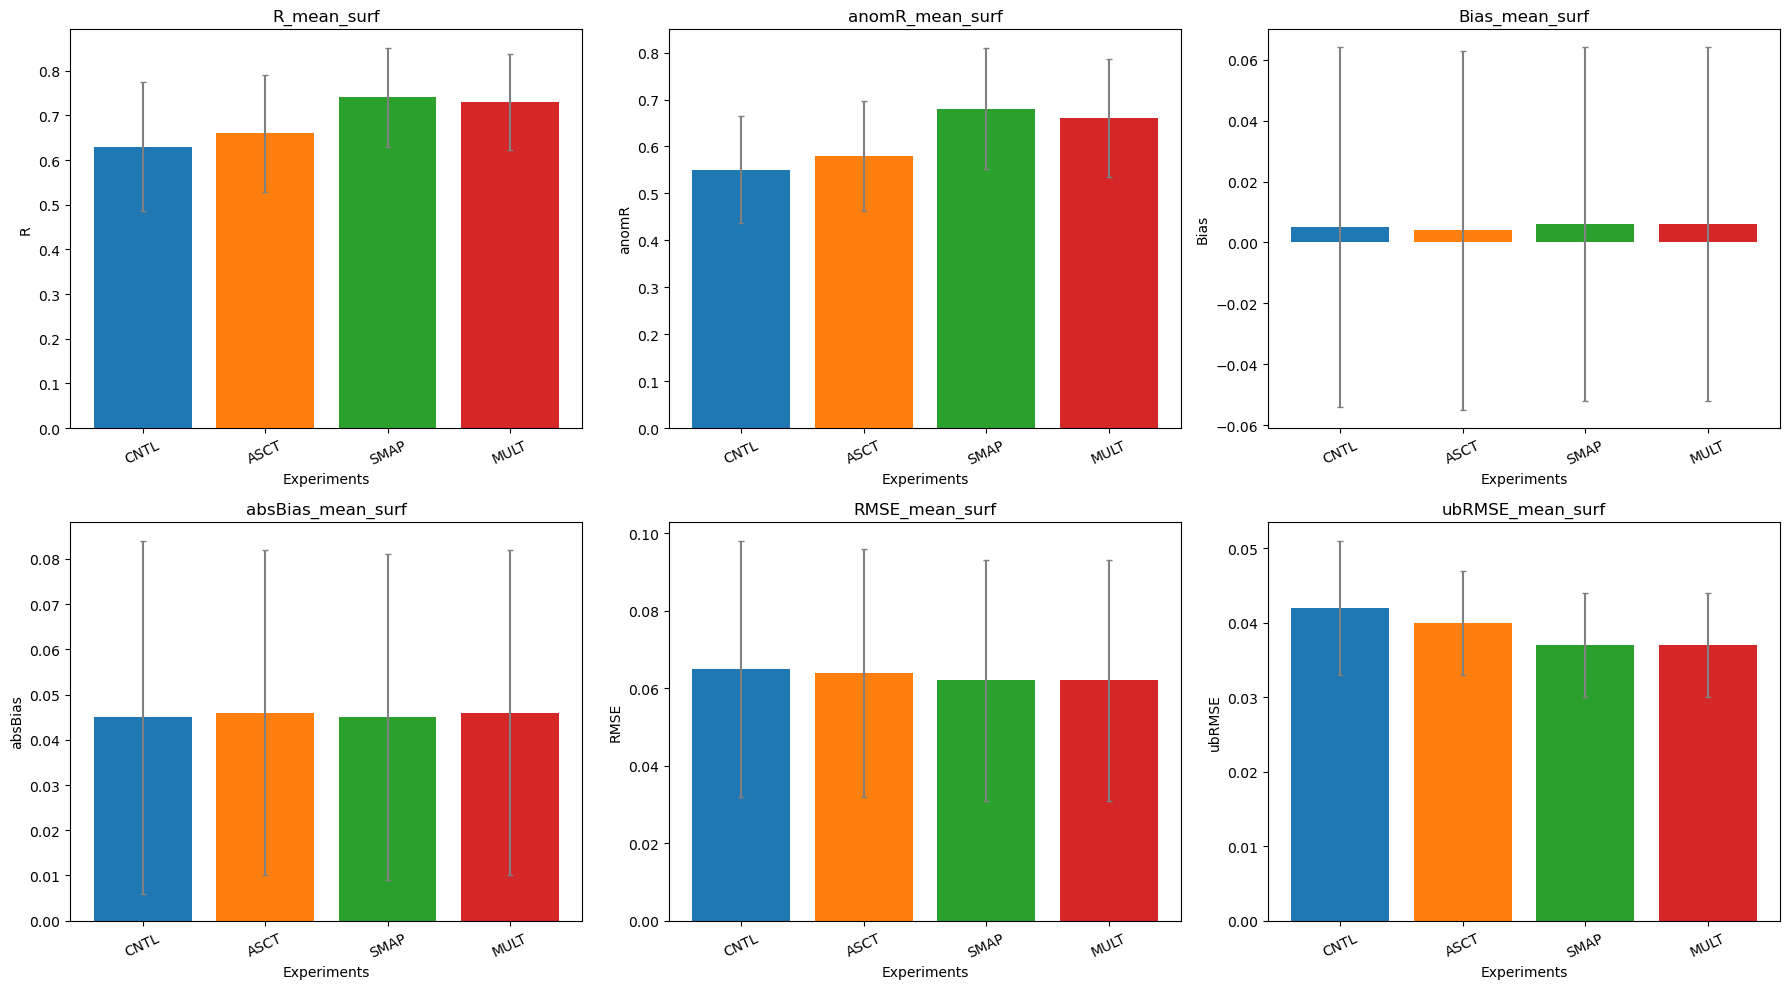

In [10]:

ind = np.arange(num_expts)

# Create a figure with a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Subplot 1: R_mean
axs[0, 0].bar(ind, R_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[0, 0].errorbar(ind, R_mean[0, :num_expts], yerr=R_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 0].set_xlabel('Experiments')
axs[0, 0].set_ylabel('R')
axs[0, 0].set_title('R_mean_surf')
axs[0, 0].set_xticks(ind)
axs[0, 0].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 2: anomR_mean
axs[0, 1].bar(ind, anomR_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[0, 1].errorbar(ind, anomR_mean[0, :num_expts], yerr=anomR_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 1].set_xlabel('Experiments')
axs[0, 1].set_ylabel('anomR')
axs[0, 1].set_title('anomR_mean_surf')
axs[0, 1].set_xticks(ind)
axs[0, 1].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 3: Bias_mean
axs[0, 2].bar(ind, Bias_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[0, 2].errorbar(ind, Bias_mean[0, :num_expts], yerr=Bias_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 2].set_xlabel('Experiments')
axs[0, 2].set_ylabel('Bias')
axs[0, 2].set_title('Bias_mean_surf')
axs[0, 2].set_xticks(ind)
axs[0, 2].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 4: absBias_mean
axs[1, 0].bar(ind, absBias_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[1, 0].errorbar(ind, absBias_mean[0, :num_expts], yerr=absBias_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 0].set_xlabel('Experiments')
axs[1, 0].set_ylabel('absBias')
axs[1, 0].set_title('absBias_mean_surf')
axs[1, 0].set_xticks(ind)
axs[1, 0].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 3: RMSE_mean
axs[1, 1].bar(ind, RMSE_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[1, 1].errorbar(ind, RMSE_mean[0, :num_expts], yerr=RMSE_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 1].set_xlabel('Experiments')
axs[1, 1].set_ylabel('RMSE')
axs[1, 1].set_title('RMSE_mean_surf')
axs[1, 1].set_xticks(ind)
axs[1, 1].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 4: ubRMSE_mean
axs[1, 2].bar(ind, ubRMSE_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[1, 2].errorbar(ind, ubRMSE_mean[0, :num_expts], yerr=ubRMSE_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 2].set_xlabel('Experiments')
axs[1, 2].set_ylabel('ubRMSE')
axs[1, 2].set_title('ubRMSE_mean_surf')
axs[1, 2].set_xticks(ind)
axs[1, 2].set_xticklabels(expt_labels[:num_expts], rotation=25)

plt.tight_layout()

plt.savefig(expt_name + '_surf_all_stats.png')

plt.show()

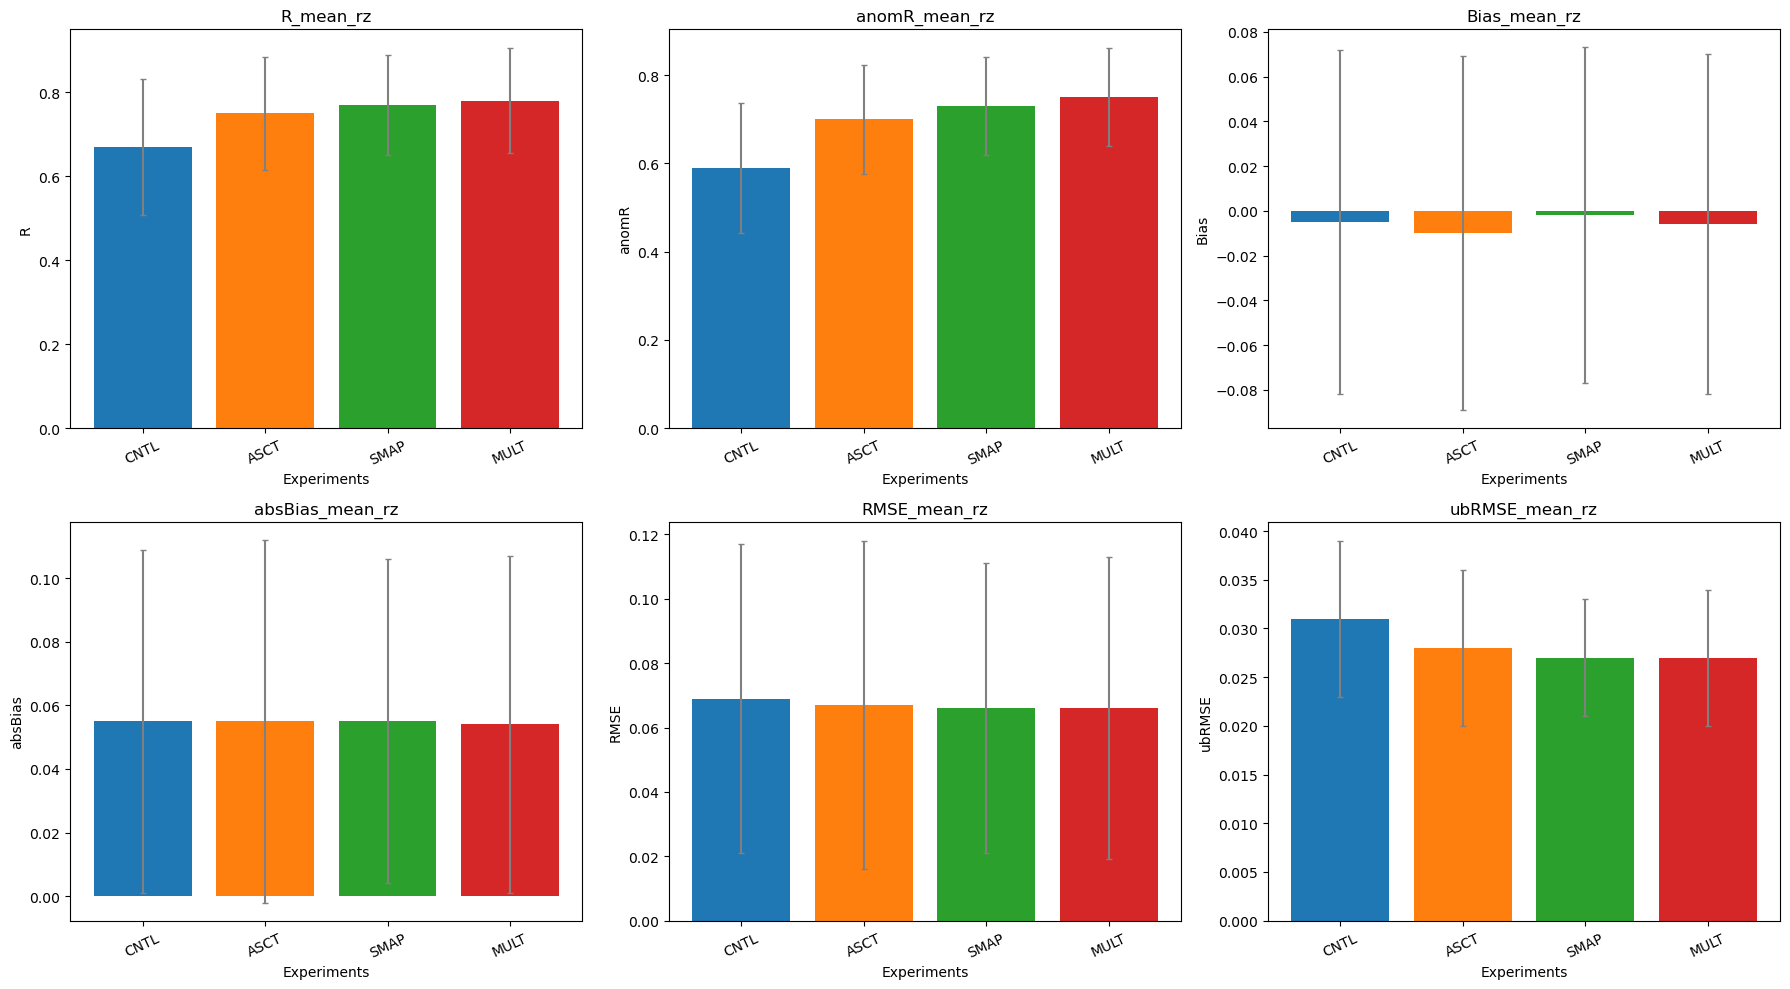

In [11]:

ind = np.arange(num_expts)

# Create a figure with a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Subplot 1: R_mean
axs[0, 0].bar(ind, R_mean[1, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[0, 0].errorbar(ind, R_mean[1, :num_expts], yerr=R_std[1, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 0].set_xlabel('Experiments')
axs[0, 0].set_ylabel('R')
axs[0, 0].set_title('R_mean_rz')
axs[0, 0].set_xticks(ind)
axs[0, 0].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 2: anomR_mean
axs[0, 1].bar(ind, anomR_mean[1, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[0, 1].errorbar(ind, anomR_mean[1, :num_expts], yerr=anomR_std[1, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 1].set_xlabel('Experiments')
axs[0, 1].set_ylabel('anomR')
axs[0, 1].set_title('anomR_mean_rz')
axs[0, 1].set_xticks(ind)
axs[0, 1].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 3: Bias_mean
axs[0, 2].bar(ind, Bias_mean[1, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[0, 2].errorbar(ind, Bias_mean[1, :num_expts], yerr=Bias_std[1, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 2].set_xlabel('Experiments')
axs[0, 2].set_ylabel('Bias')
axs[0, 2].set_title('Bias_mean_rz')
axs[0, 2].set_xticks(ind)
axs[0, 2].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 4: absBias_mean
axs[1, 0].bar(ind, absBias_mean[1, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[1, 0].errorbar(ind, absBias_mean[1, :num_expts], yerr=absBias_std[1, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 0].set_xlabel('Experiments')
axs[1, 0].set_ylabel('absBias')
axs[1, 0].set_title('absBias_mean_rz')
axs[1, 0].set_xticks(ind)
axs[1, 0].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 3: RMSE_mean
axs[1, 1].bar(ind, RMSE_mean[1, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[1, 1].errorbar(ind, RMSE_mean[1, :num_expts], yerr=RMSE_std[1, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 1].set_xlabel('Experiments')
axs[1, 1].set_ylabel('RMSE')
axs[1, 1].set_title('RMSE_mean_rz')
axs[1, 1].set_xticks(ind)
axs[1, 1].set_xticklabels(expt_labels[:num_expts], rotation=25)

# Subplot 4: ubRMSE_mean
axs[1, 2].bar(ind, ubRMSE_mean[1, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
axs[1, 2].errorbar(ind, ubRMSE_mean[1, :num_expts], yerr=ubRMSE_std[1, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 2].set_xlabel('Experiments')
axs[1, 2].set_ylabel('ubRMSE')
axs[1, 2].set_title('ubRMSE_mean_rz')
axs[1, 2].set_xticks(ind)
axs[1, 2].set_xticklabels(expt_labels[:num_expts], rotation=25)

plt.tight_layout()

plt.savefig(expt_name + '_rz_all_stats.png')

plt.show()

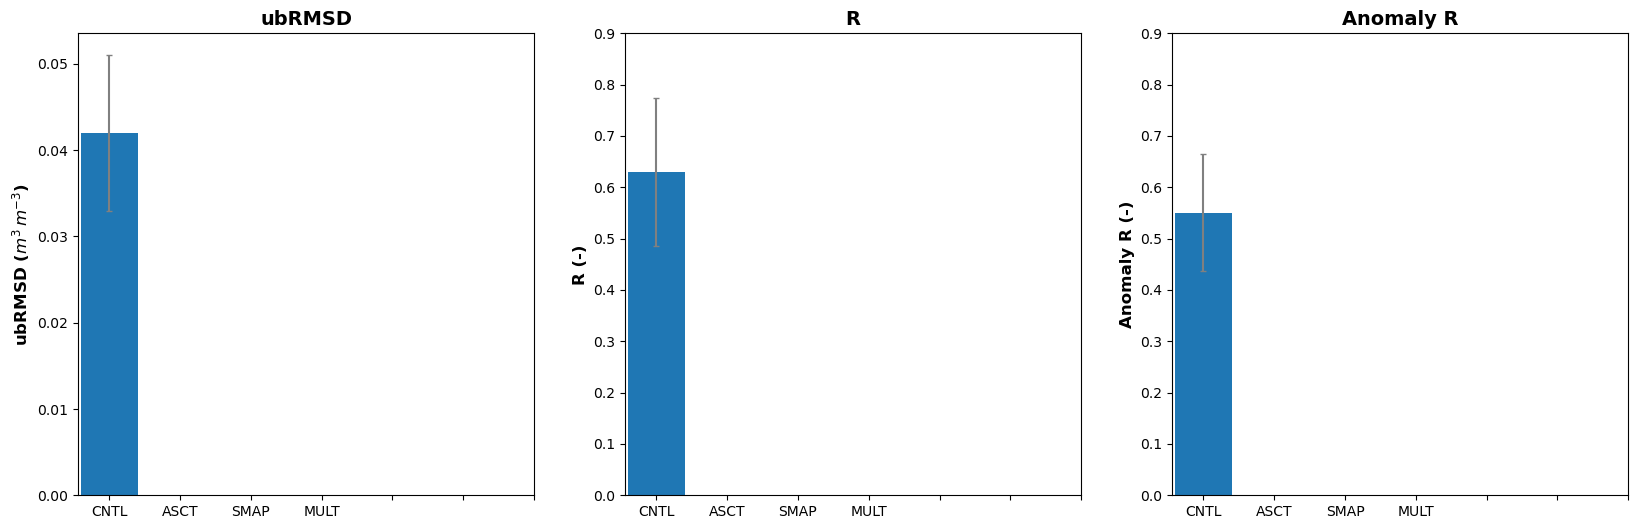

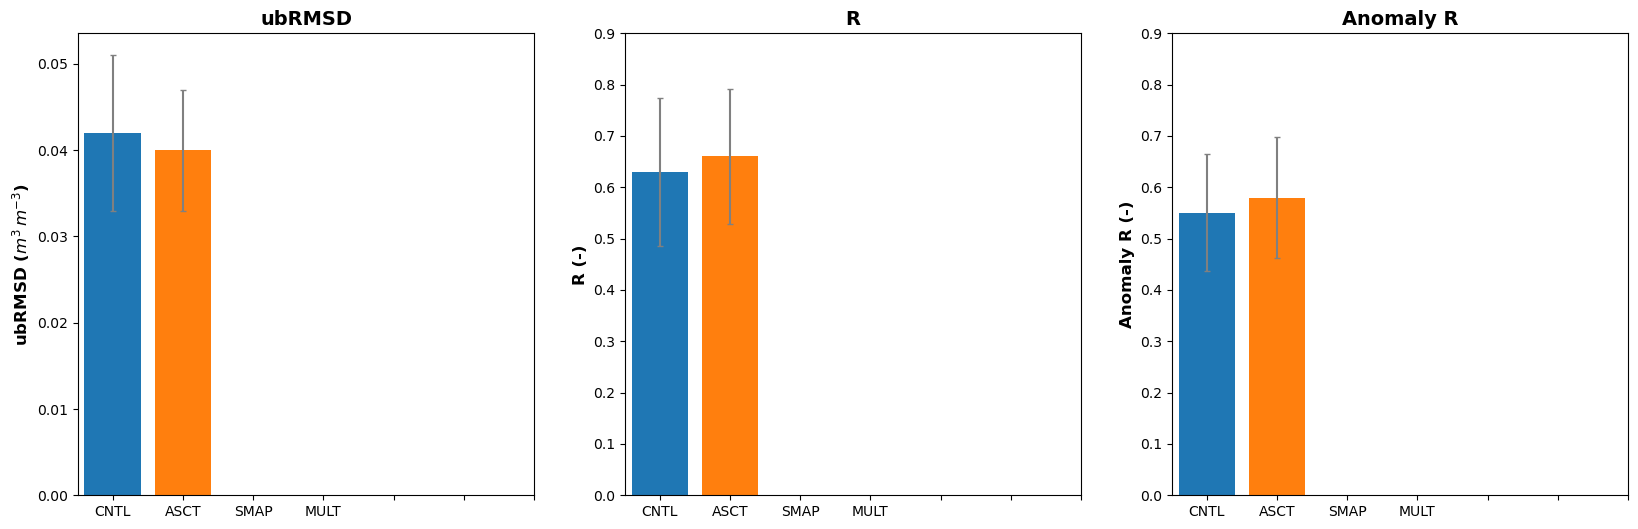

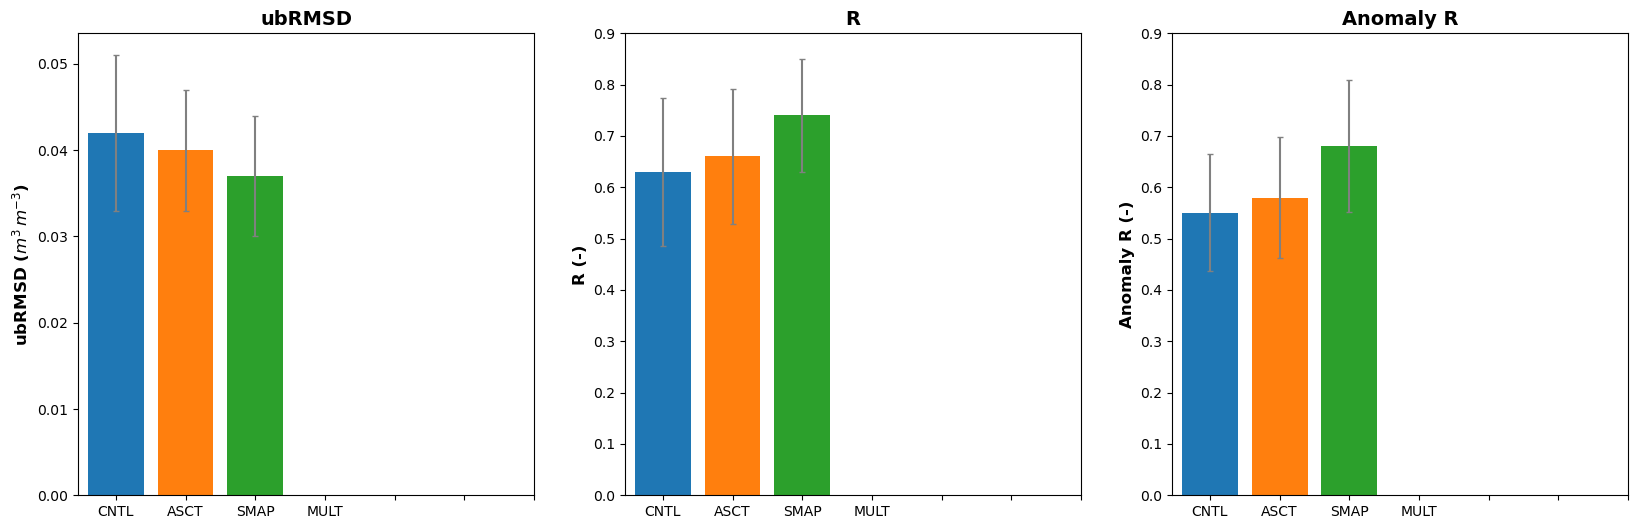

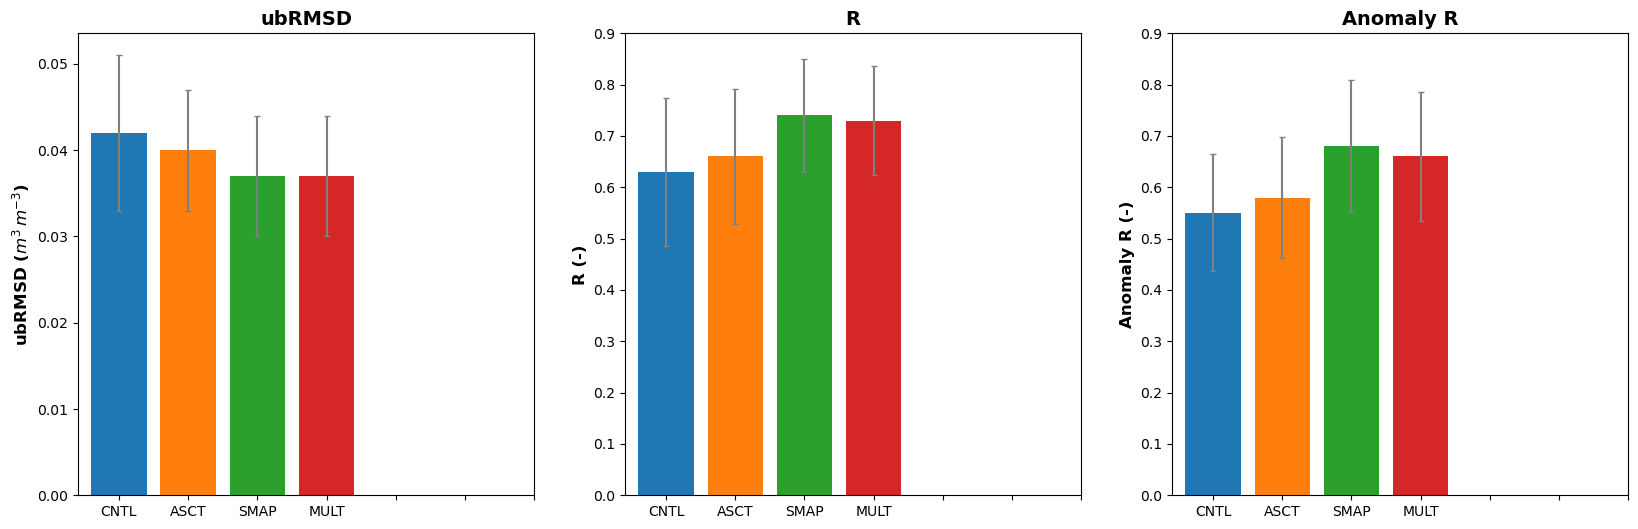

In [12]:
ind = np.arange(7)

for num_expts in range(1, 5):


    # Create a figure with a 2x3 subplot grid
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    # Subplot 4: ubRMSE_mean
    axs[0].bar(ind[:num_expts], ubRMSE_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
    axs[0].errorbar(ind[:num_expts], ubRMSE_mean[0, :num_expts], yerr=ubRMSE_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
    axs[0].set_ylabel('ubRMSD ($m^3 \, m^{-3}$)', weight='bold', fontsize=12)
    axs[0].set_title('ubRMSD', weight='bold', fontsize=14)
    axs[0].set_xticks(ind)
    axs[0].set_xticklabels(expt_labels)
    axs[1].set_ylim(0, 0.055)

    # Subplot 1: R_mean
    axs[1].bar(ind[:num_expts], R_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
    axs[1].errorbar(ind[:num_expts], R_mean[0, :num_expts], yerr=R_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
    axs[1].set_ylabel('R (-)', weight='bold', fontsize=12)
    axs[1].set_title('R', weight='bold', fontsize=14)
    axs[1].set_xticks(ind)
    axs[1].set_xticklabels(expt_labels)
    axs[1].set_ylim(0, 0.9)

    # Subplot 2: anomR_mean
    axs[2].bar(ind[:num_expts], anomR_mean[0, :num_expts], color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:num_expts])
    axs[2].errorbar(ind[:num_expts], anomR_mean[0, :num_expts], yerr=anomR_std[0, :num_expts], fmt='none', ecolor='grey', capsize=2)
    axs[2].set_ylabel('Anomaly R (-)', weight='bold', fontsize=12)
    axs[2].set_title('Anomaly R', weight='bold', fontsize=14)
    axs[2].set_xticks(ind)
    axs[2].set_xticklabels(expt_labels)
    axs[2].set_ylim(0, 0.9)

    # plt.tight_layout()
    outputname = f"_all_stats_v{num_expts}.png"
    plt.savefig(expt_name + outputname, dpi = 400, bbox_inches='tight')

    plt.show()

In [13]:
from tabulate import tabulate

# Define the data for the table
table_data = [
    ['R_mean'] + [R_mean[0, expt] for expt in range(num_expts)],
    ['anomR_mean'] + [anomR_mean[0, expt] for expt in range(num_expts)],
    ['Bias_mean'] + [Bias_mean[0, expt] for expt in range(num_expts)],
    ['absBias_mean'] + [absBias_mean[0, expt] for expt in range(num_expts)],
    ['RMSE_mean'] + [RMSE_mean[0, expt] for expt in range(num_expts)],
    ['ubRMSE_mean'] + [ubRMSE_mean[0, expt] for expt in range(num_expts)],
]

# Define the headers for the table
table_headers = expt_labels
table_headers.insert(0, "")

# Generate the table
table = tabulate(table_data, headers=table_headers, tablefmt='grid')

# Print the table
print(table)

# Generate a table with the same data but in csv format
table = tabulate(table_data, headers=table_headers, tablefmt='plain')

# Save the table to a file
with open(expt_name + '_table_srf.csv', 'w') as file:
    file.write(table)

+--------------+--------+--------+--------+--------+
|              |   CNTL |   ASCT |   SMAP |   MULT |
+==============+========+========+========+========+
| R_mean       |  0.63  |  0.66  |  0.74  |  0.73  |
+--------------+--------+--------+--------+--------+
| anomR_mean   |  0.55  |  0.58  |  0.68  |  0.66  |
+--------------+--------+--------+--------+--------+
| Bias_mean    |  0.005 |  0.004 |  0.006 |  0.006 |
+--------------+--------+--------+--------+--------+
| absBias_mean |  0.045 |  0.046 |  0.045 |  0.046 |
+--------------+--------+--------+--------+--------+
| RMSE_mean    |  0.065 |  0.064 |  0.062 |  0.062 |
+--------------+--------+--------+--------+--------+
| ubRMSE_mean  |  0.042 |  0.04  |  0.037 |  0.037 |
+--------------+--------+--------+--------+--------+


In [14]:
from tabulate import tabulate

# Define the data for the table
table_data = [
    ['R_mean'] + [R_mean[1, expt] for expt in range(num_expts)],
    ['anomR_mean'] + [anomR_mean[1, expt] for expt in range(num_expts)],
    ['Bias_mean'] + [Bias_mean[1, expt] for expt in range(num_expts)],
    ['absBias_mean'] + [absBias_mean[1, expt] for expt in range(num_expts)],
    ['RMSE_mean'] + [RMSE_mean[1, expt] for expt in range(num_expts)],
    ['ubRMSE_mean'] + [ubRMSE_mean[1, expt] for expt in range(num_expts)],
]

# Define the headers for the table
table_headers = expt_labels

# Generate the table
table = tabulate(table_data, headers=table_headers, tablefmt='grid')

# Print the table
print(table)

# Generate simple table
table = tabulate(table_data, headers=table_headers, tablefmt='plain')

# Save the table to a file
with open(expt_name + '_table_rz.csv', 'w') as file:
    file.write(table)

+--------------+--------+--------+--------+--------+
|              |   CNTL |   ASCT |   SMAP |   MULT |
+==============+========+========+========+========+
| R_mean       |  0.67  |  0.75  |  0.77  |  0.78  |
+--------------+--------+--------+--------+--------+
| anomR_mean   |  0.59  |  0.7   |  0.73  |  0.75  |
+--------------+--------+--------+--------+--------+
| Bias_mean    | -0.005 | -0.01  | -0.002 | -0.006 |
+--------------+--------+--------+--------+--------+
| absBias_mean |  0.055 |  0.055 |  0.055 |  0.054 |
+--------------+--------+--------+--------+--------+
| RMSE_mean    |  0.069 |  0.067 |  0.066 |  0.066 |
+--------------+--------+--------+--------+--------+
| ubRMSE_mean  |  0.031 |  0.028 |  0.027 |  0.027 |
+--------------+--------+--------+--------+--------+


In [15]:
import pandas as pd
from tabulate import tabulate

# Define the data for the table
table_data = [
    ['Surface SM'],
    ['R_mean'] + [R_mean[0, expt] for expt in range(num_expts)],
    ['anomR_mean'] + [anomR_mean[0, expt] for expt in range(num_expts)],
    ['Bias_mean'] + [Bias_mean[0, expt] for expt in range(num_expts)],
    ['absBias_mean'] + [absBias_mean[0, expt] for expt in range(num_expts)],
    ['RMSE_mean'] + [RMSE_mean[0, expt] for expt in range(num_expts)],
    ['ubRMSE_mean'] + [ubRMSE_mean[0, expt] for expt in range(num_expts)],
    [],
    ['Rootzone SM'],
    ['R_mean'] + [R_mean[1, expt] for expt in range(num_expts)],
    ['anomR_mean'] + [anomR_mean[1, expt] for expt in range(num_expts)],
    ['Bias_mean'] + [Bias_mean[1, expt] for expt in range(num_expts)],
    ['absBias_mean'] + [absBias_mean[1, expt] for expt in range(num_expts)],
    ['RMSE_mean'] + [RMSE_mean[1, expt] for expt in range(num_expts)],
    ['ubRMSE_mean'] + [ubRMSE_mean[1, expt] for expt in range(num_expts)],
]

# Define the headers for the table
table_headers = expt_labels[:num_expts+1]

# Generate the table
table = tabulate(table_data, headers=table_headers, tablefmt='grid')

# Print the table
print(table)

# Generate simple table
table = tabulate(table_data, headers=table_headers, tablefmt='plain')

# Save the table to a CSV file
csv_filename = expt_name + '_table_combined.csv'
with open(csv_filename, 'w') as file:
    file.write(table)


# Save the table to an Excel spreadsheet
excel_filename = expt_name + '_table_combined.xlsx'
df = pd.DataFrame(table_data, columns=table_headers)
df.to_excel(excel_filename, index=False)

print(f'Table saved as {csv_filename} (CSV) and {excel_filename} (Excel).')    


+--------------+--------+--------+--------+--------+
|              |   CNTL |   ASCT |   SMAP |   MULT |
+==============+========+========+========+========+
| Surface SM   |        |        |        |        |
+--------------+--------+--------+--------+--------+
| R_mean       |  0.63  |  0.66  |  0.74  |  0.73  |
+--------------+--------+--------+--------+--------+
| anomR_mean   |  0.55  |  0.58  |  0.68  |  0.66  |
+--------------+--------+--------+--------+--------+
| Bias_mean    |  0.005 |  0.004 |  0.006 |  0.006 |
+--------------+--------+--------+--------+--------+
| absBias_mean |  0.045 |  0.046 |  0.045 |  0.046 |
+--------------+--------+--------+--------+--------+
| RMSE_mean    |  0.065 |  0.064 |  0.062 |  0.062 |
+--------------+--------+--------+--------+--------+
| ubRMSE_mean  |  0.042 |  0.04  |  0.037 |  0.037 |
+--------------+--------+--------+--------+--------+
|              |        |        |        |        |
+--------------+--------+--------+--------+---